In [1]:
%matplotlib inline
%matplotlib notebook

from threeML import *
import os

Configuration read from /Users/jburgess/.threeML/threeML_config.yml


Auto-probed noise models:
- observation: gaussian
- background: None
Range 15-150 translates to channels 3-62
Now using 60 channels out of 80



WARNING RuntimeWarning: Maximum MC energy is smaller than maximum EBOUNDS energy



<IPython.core.display.Javascript object>


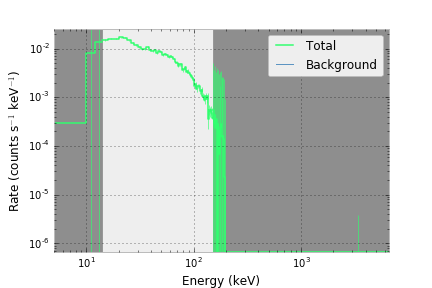

Auto-probed noise models:
- observation: poisson
- background: gaussian
Range 8-900 translates to channels 2-124
Now using 123 channels out of 128



WARNING RuntimeWarning: invalid value encountered in sqrt


WARNING RuntimeWarning: Maximum MC energy is smaller than maximum EBOUNDS energy


WARNING RuntimeWarning: Minimum MC energy is larger than minimum EBOUNDS energy



<IPython.core.display.Javascript object>


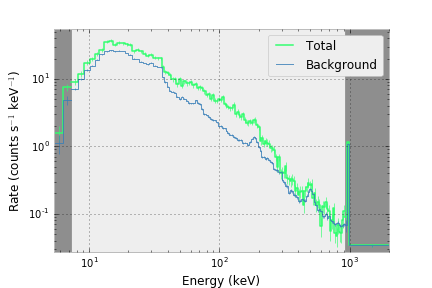

Auto-probed noise models:
- observation: poisson
- background: gaussian
Range 250-10000 translates to channels 1-90
Now using 90 channels out of 128



WARNING RuntimeWarning: Maximum MC energy is smaller than maximum EBOUNDS energy


WARNING RuntimeWarning: Minimum MC energy is larger than minimum EBOUNDS energy



<IPython.core.display.Javascript object>


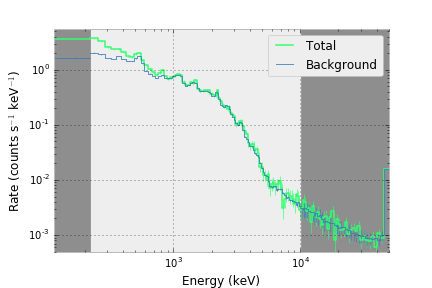

In [4]:
gbm_dir = "gbm"
bat_dir = "bat"

bat = OGIPLike('BAT',
               observation=os.path.join(bat_dir,'gbm_bat_joint_BAT.pha'),
               response=os.path.join(bat_dir,'gbm_bat_joint_BAT.rsp'))

bat.set_active_measurements('15-150')
bat.view_count_spectrum()


nai6 = OGIPLike('n6',
                os.path.join(gbm_dir,'gbm_bat_joint_NAI_06.pha'),
                os.path.join(gbm_dir,'gbm_bat_joint_NAI_06.bak'),
                os.path.join(gbm_dir,'gbm_bat_joint_NAI_06.rsp'),
                spectrum_number=1)


nai6.set_active_measurements('8-900')
nai6.view_count_spectrum()

bgo0 = OGIPLike('b0',
                os.path.join(gbm_dir,'gbm_bat_joint_BGO_00.pha'),
                os.path.join(gbm_dir,'gbm_bat_joint_BGO_00.bak'),
                os.path.join(gbm_dir,'gbm_bat_joint_BGO_00.rsp'),
                spectrum_number=1)

bgo0.set_active_measurements('250-10000')
bgo0.view_count_spectrum()

In [16]:
bat.use_effective_area_correction(.2,1.5)
band = Band()
model = Model(PointSource('joint_fit',0,0,spectral_shape=band))

data_list = DataList(bat,nai6,bgo0)


jl = JointLikelihood(model, data_list)


In [18]:
_=jl.fit()

Best fit values:



,Value,Unit
joint_fit.spectrum.main.Band.K,(4.73 +/- 0.20) x 10^-2,1 / (cm2 keV s)
joint_fit.spectrum.main.Band.alpha,(-9.84 +/- 0.18) x 10^-1,
joint_fit.spectrum.main.Band.xp,(3.10 +/- 0.19) x 10^2,keV
joint_fit.spectrum.main.Band.beta,-2.44 +/- 0.17,
cons_BAT,(6.38 +/- 0.15) x 10^-1,



Correlation matrix:



1.00,0.79,-0.89,0.29,-0.80
0.79,1.00,-0.80,0.36,-0.31
-0.89,-0.80,1.00,-0.52,0.53
0.29,0.36,-0.52,1.00,-0.02
-0.80,-0.31,0.53,-0.02,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
BAT,78.719066
b0,462.168155
n6,646.768409
total,1187.655631


<IPython.core.display.Javascript object>


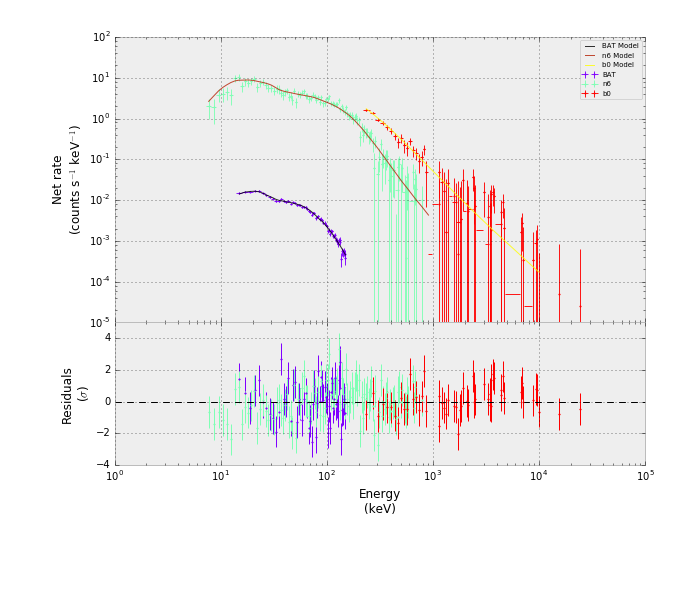

In [19]:
_=display_spectrum_model_counts(jl,step=False)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


<IPython.core.display.Javascript object>


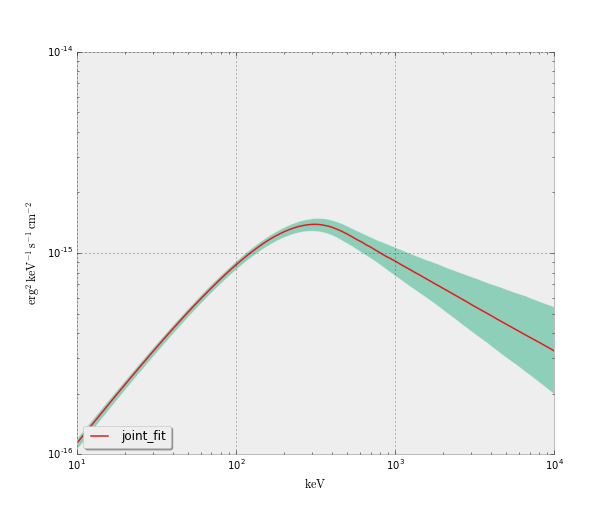

In [20]:
plot_point_source_spectra(jl.results,flux_unit='erg2/(keV s cm2)')